C:\Users\rozak\AppData\Local\Temp\ipykernel_2112\4049390609.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="F1_macro", y="FS_Method", hue="Model", ci=None)


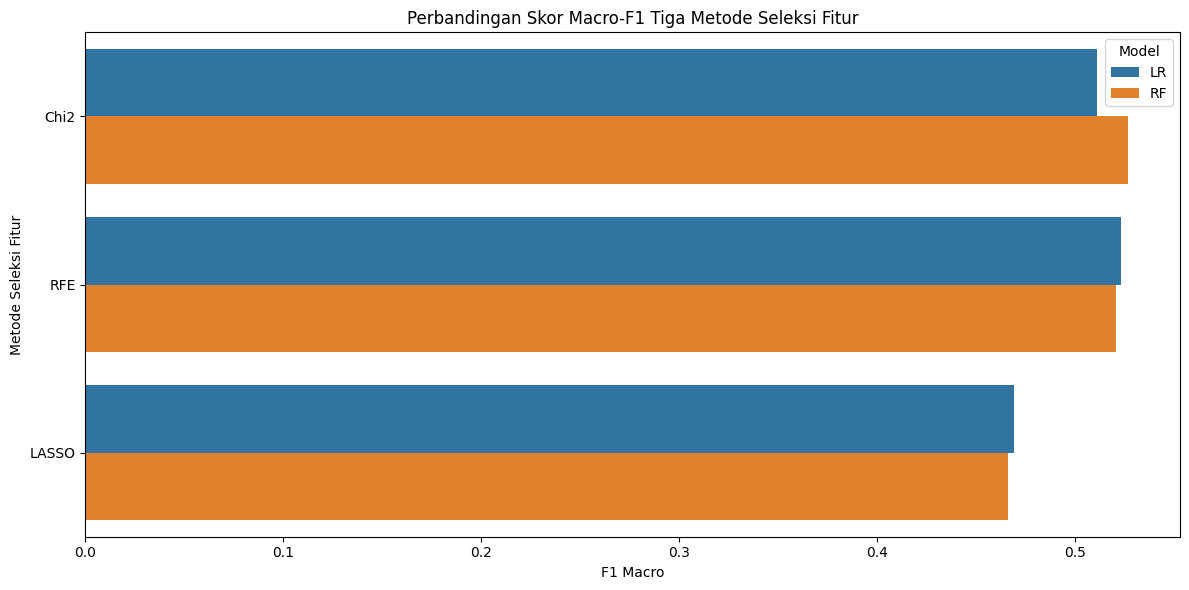

C:\Users\rozak\AppData\Local\Temp\ipykernel_2112\4049390609.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Time_sec", y="FS_Method", hue="Model", ci=None)


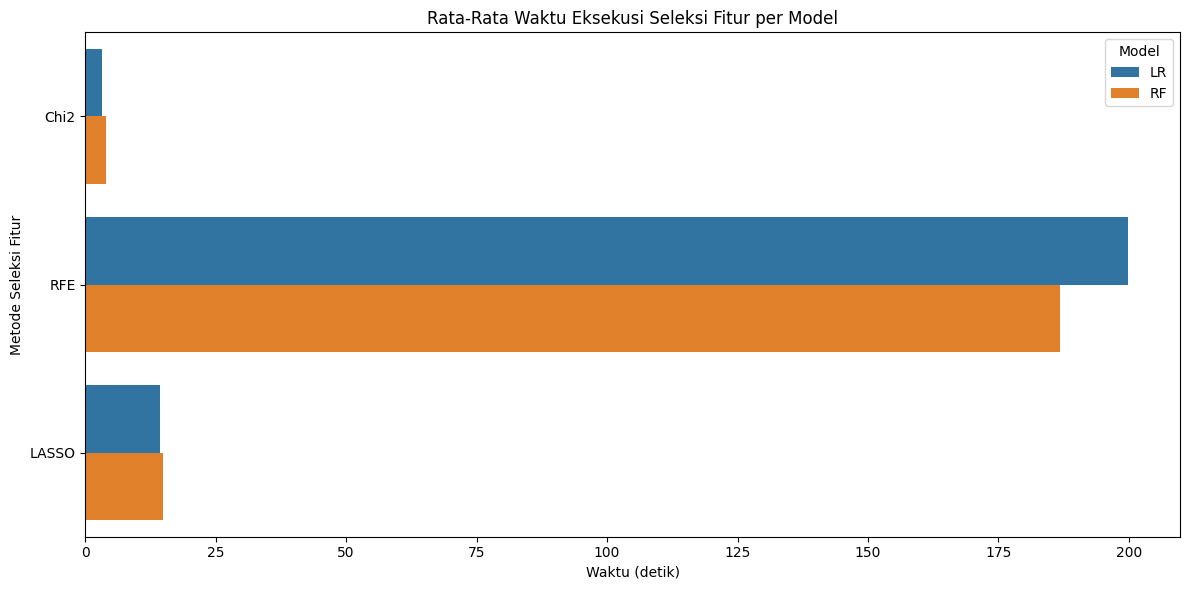

C:\Users\rozak\AppData\Local\Temp\ipykernel_2112\4049390609.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Memory_MB", y="FS_Method", hue="Model", ci=None)


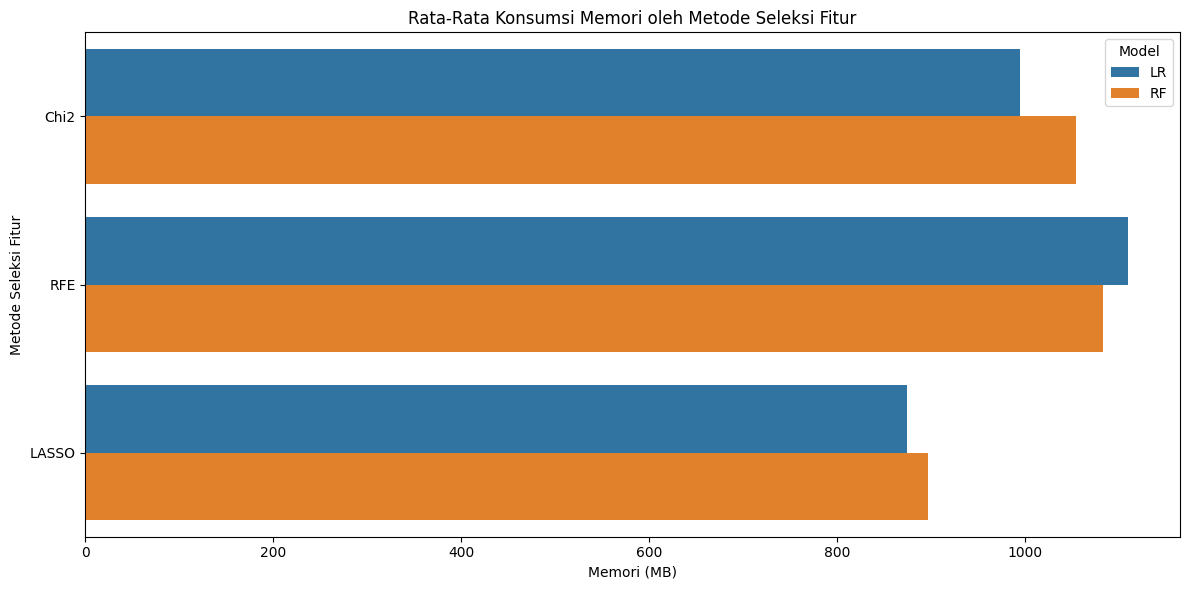

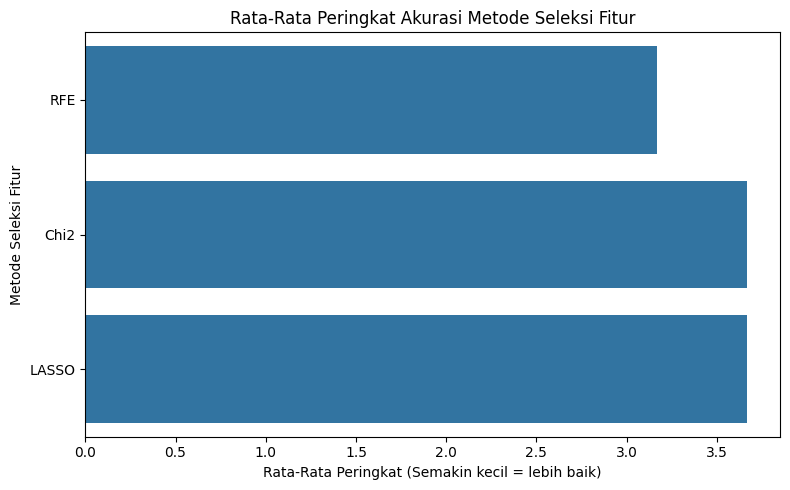

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata

# Load hasil evaluasi
df = pd.read_csv("fs_evaluation_3domain_full.csv")

# --- Bagian 1: Tabel Ringkasan Rata-Rata ---
summary = df.groupby("FS_Method").agg({
    "F1_macro": "mean",
    "Time_sec": "mean",
    "Memory_MB": "mean"
}).reset_index()


# --- Bagian 2: Visualisasi ---

# Plot 1: Macro-F1 per domain × model × FS
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="F1_macro", y="FS_Method", hue="Model", ci=None)
plt.title("Perbandingan Skor Macro-F1 Tiga Metode Seleksi Fitur")
plt.xlabel("F1 Macro")
plt.ylabel("Metode Seleksi Fitur")
plt.tight_layout()
plt.show()

# Plot 2: Waktu per domain × model × FS
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Time_sec", y="FS_Method", hue="Model", ci=None)
plt.title("Rata-Rata Waktu Eksekusi Seleksi Fitur per Model")
plt.xlabel("Waktu (detik)")
plt.ylabel("Metode Seleksi Fitur")
plt.tight_layout()
plt.show()

# Plot 3: Memori per domain × model × FS
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Memory_MB", y="FS_Method", hue="Model", ci=None)
plt.title("Rata-Rata Konsumsi Memori oleh Metode Seleksi Fitur")
plt.xlabel("Memori (MB)")
plt.ylabel("Metode Seleksi Fitur")
plt.tight_layout()
plt.show()

# Plot 4: Peringkat Akurasi per metode × model × domain
ranks = []
for dom in df["Domain"].unique():
    sub = df[df["Domain"] == dom]
    mean_acc = sub.groupby(["FS_Method", "Model"])["Accuracy"].mean().reset_index()
    mean_acc["Rank"] = rankdata(-mean_acc["Accuracy"])
    mean_acc["Domain"] = dom
    ranks.append(mean_acc)

ranks_df = pd.concat(ranks)
avg_rank = ranks_df.groupby("FS_Method")["Rank"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rank.values, y=avg_rank.index, orient="h")
plt.xlabel("Rata-Rata Peringkat (Semakin kecil = lebih baik)")
plt.ylabel("Metode Seleksi Fitur")
plt.title("Rata-Rata Peringkat Akurasi Metode Seleksi Fitur")
plt.tight_layout()
plt.show()



In [4]:
f1_table = df.pivot_table(index="FS_Method", columns="Domain", values="F1_macro", aggfunc="mean").round(2)
print("Table 1: Rata-Rata Skor Macro-F1 Tiap Metode Seleksi Fitur")
print(f1_table)
f1_table.to_csv("table_f1_macro.csv")


Table 1: Rata-Rata Skor Macro-F1 Tiap Metode Seleksi Fitur
Domain     BreastCancer  MNIST  NewsGroup
FS_Method                                
Chi2               0.94   0.37       0.25
LASSO              0.95   0.19       0.26
RFE                0.94   0.35       0.27


In [5]:
time_table = df.pivot_table(index="FS_Method", columns="Domain", values="Time_sec", aggfunc="mean").round(2)
print("Table 2: Rata-Rata Waktu Eksekusi Seleksi Fitur")
print(time_table)
time_table.to_csv("table_exec_time.csv")


Table 2: Rata-Rata Waktu Eksekusi Seleksi Fitur
Domain     BreastCancer   MNIST  NewsGroup
FS_Method                                 
Chi2               3.57    5.35       1.76
LASSO              2.91   35.07       5.73
RFE                2.95  539.87      37.23


In [6]:
memory_table = df.pivot_table(index="FS_Method", columns="Domain", values="Memory_MB", aggfunc="mean").round(2)
print("Table 3: Rata-Rata Konsumsi Memori Seleksi Fitur")
print(memory_table)
memory_table.to_csv("table_memory_usage.csv")


Table 3: Rata-Rata Konsumsi Memori Seleksi Fitur
Domain     BreastCancer    MNIST  NewsGroup
FS_Method                                  
Chi2             808.73  1775.05     488.32
LASSO            809.61  1326.97     518.87
RFE              809.28  1877.64     601.35


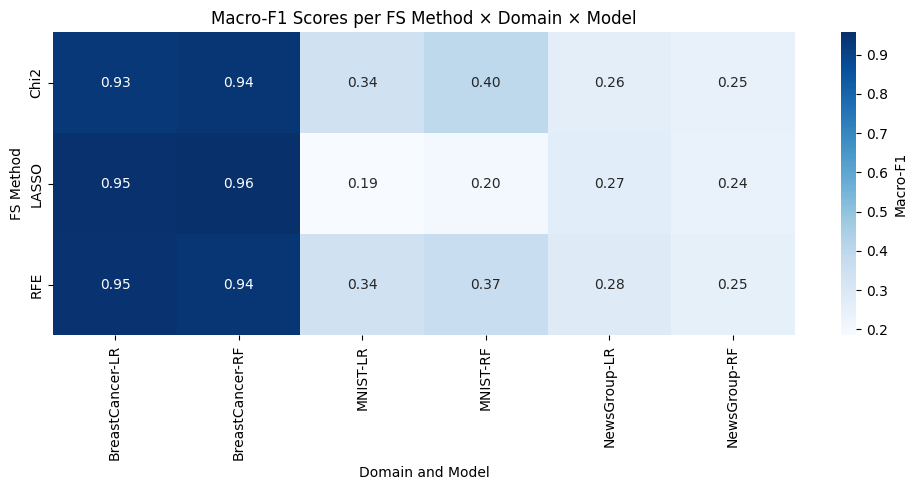

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data evaluasi
df = pd.read_csv("fs_evaluation_3domain_full.csv")

# Gabungkan kolom Domain dan Model menjadi satu label untuk kolom heatmap
df["Domain_Model"] = df["Domain"] + "-" + df["Model"]

# Pivot ke format heatmap: index = FS Method, columns = Domain+Model, values = F1_macro
heatmap_data = df.pivot(index="FS_Method", columns="Domain_Model", values="F1_macro")

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", cbar_kws={"label": "Macro-F1"})
plt.title("Macro-F1 Scores per FS Method × Domain × Model")
plt.xlabel("Domain and Model")
plt.ylabel("FS Method")
plt.tight_layout()
plt.show()


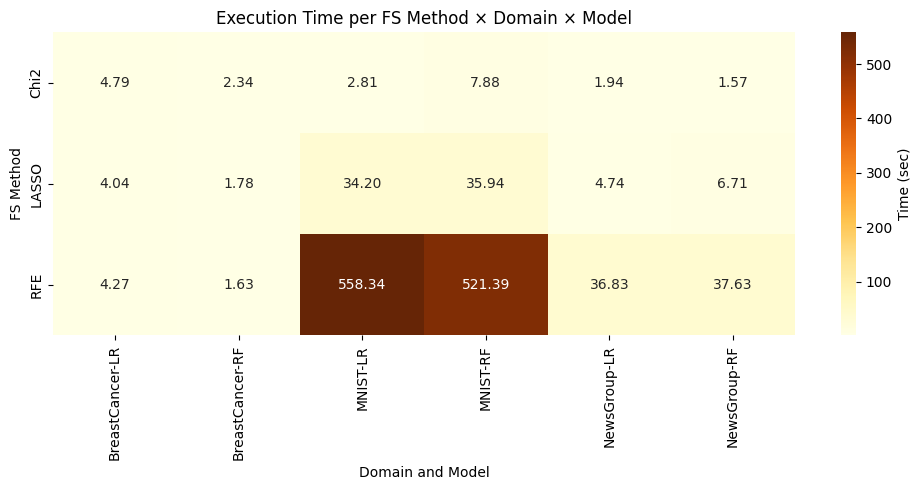

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load hasil evaluasi
df = pd.read_csv("fs_evaluation_3domain_full.csv")

# Gabungkan kolom Domain dan Model
df["Domain_Model"] = df["Domain"] + "-" + df["Model"]

# Pivot tabel waktu
time_heatmap = df.pivot(index="FS_Method", columns="Domain_Model", values="Time_sec")

# Plot heatmap waktu
plt.figure(figsize=(10, 5))
sns.heatmap(time_heatmap, annot=True, fmt=".2f", cmap="YlOrBr", cbar_kws={"label": "Time (sec)"})
plt.title("Execution Time per FS Method × Domain × Model")
plt.xlabel("Domain and Model")
plt.ylabel("FS Method")
plt.tight_layout()
plt.show()


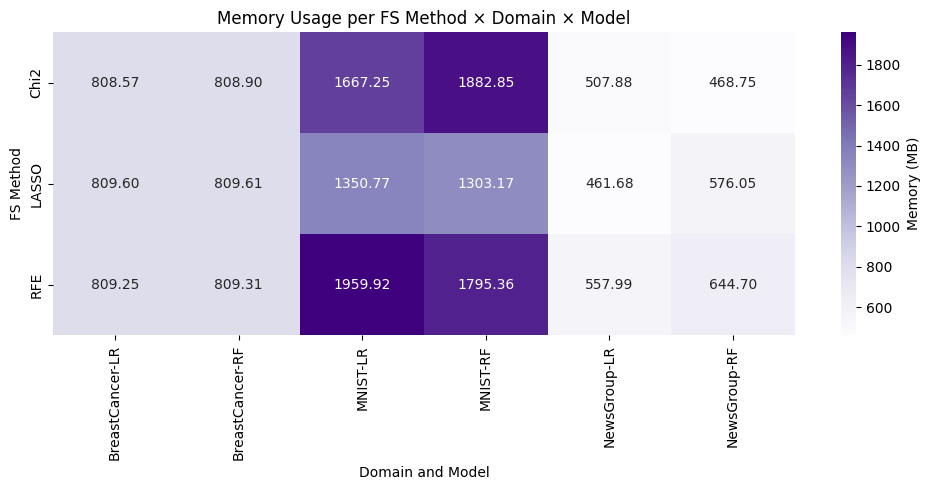

In [10]:
# Pivot tabel memori
memory_heatmap = df.pivot(index="FS_Method", columns="Domain_Model", values="Memory_MB")

# Plot heatmap memori
plt.figure(figsize=(10, 5))
sns.heatmap(memory_heatmap, annot=True, fmt=".2f", cmap="Purples", cbar_kws={"label": "Memory (MB)"})
plt.title("Memory Usage per FS Method × Domain × Model")
plt.xlabel("Domain and Model")
plt.ylabel("FS Method")
plt.tight_layout()
plt.show()
